In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [40]:
df = pd.read_csv("FuelConsumptionDataset.csv")
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


/home/dsc2/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


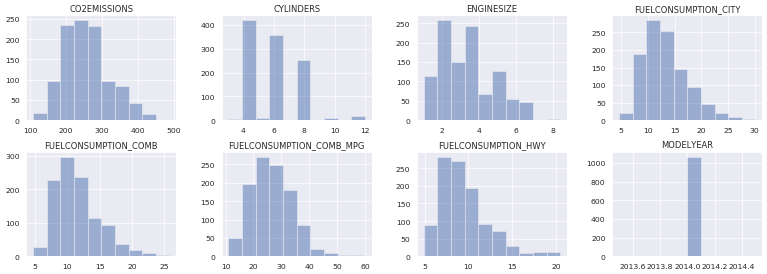

In [41]:
fig, ax = plt.subplots(figsize=(19,10), dpi=50);
df.hist(ax=ax, layout=(3,4), alpha=0.5);

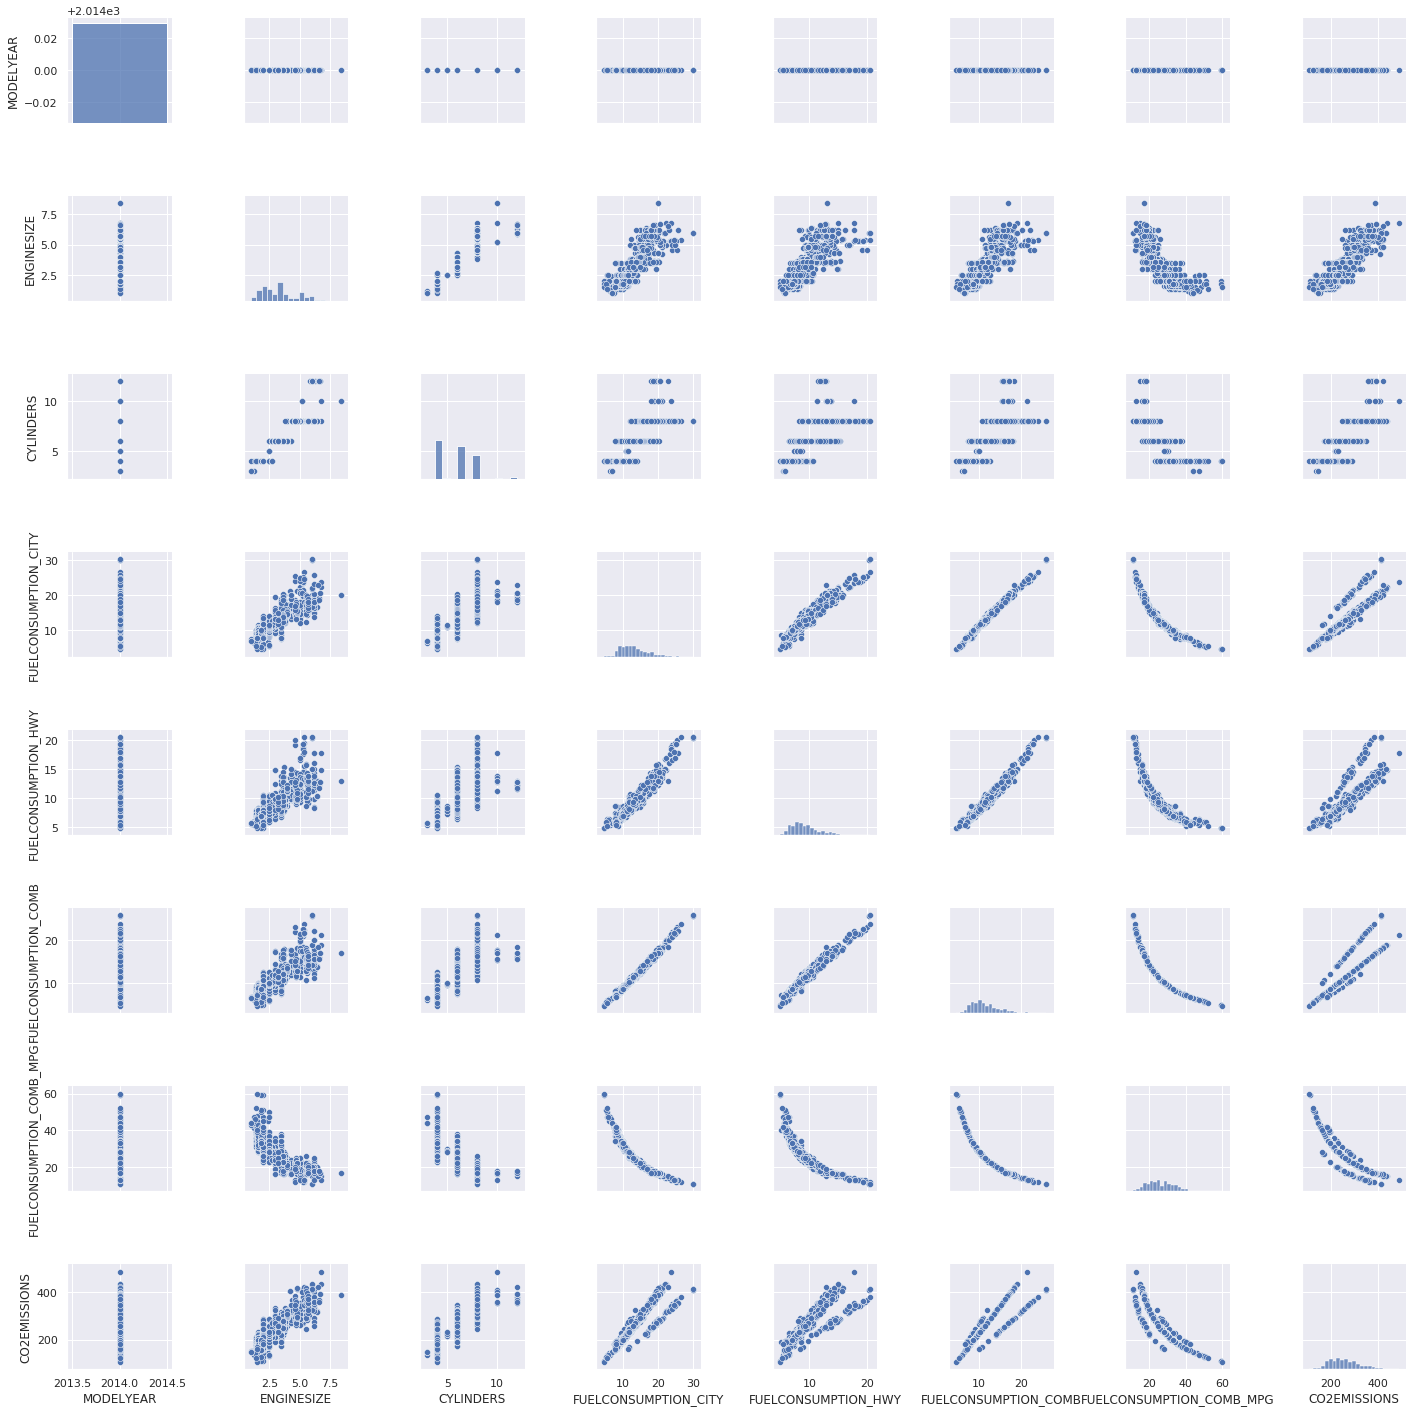

In [42]:
sns.pairplot(df)

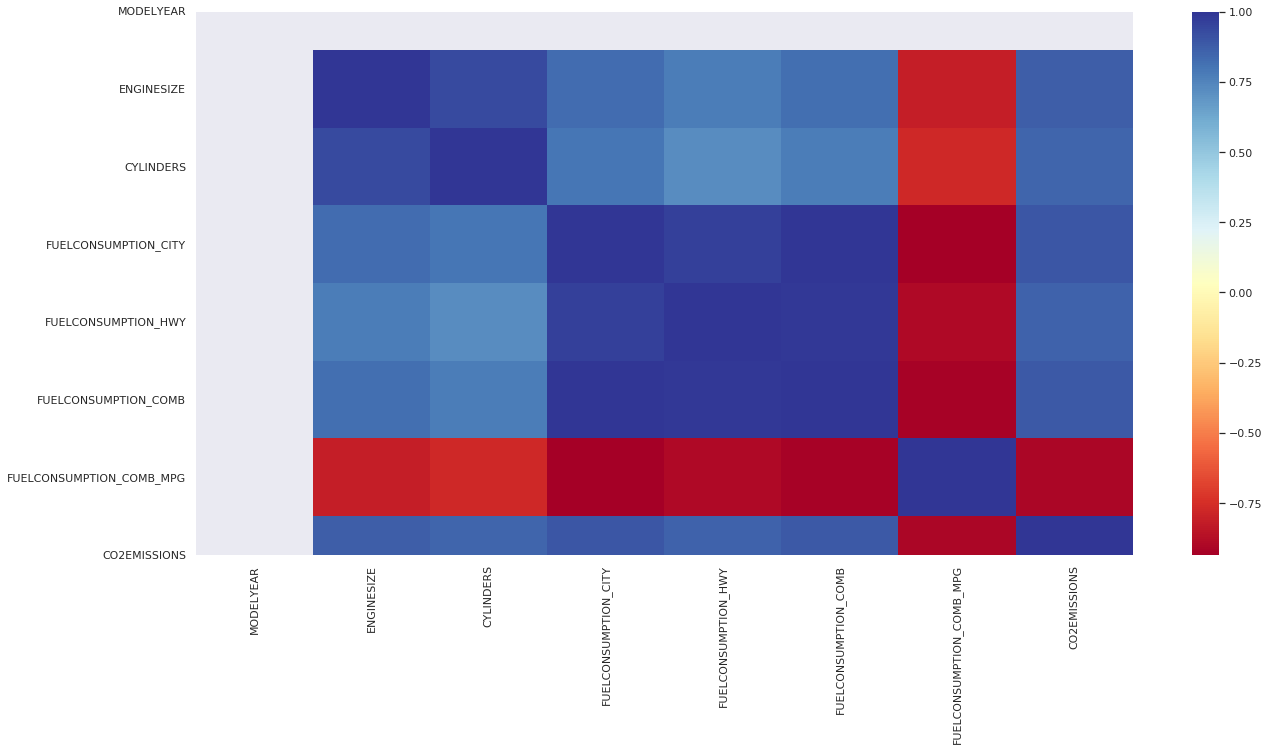

In [43]:
sns.heatmap(df.corr(), cmap='RdYlBu')

In [44]:
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

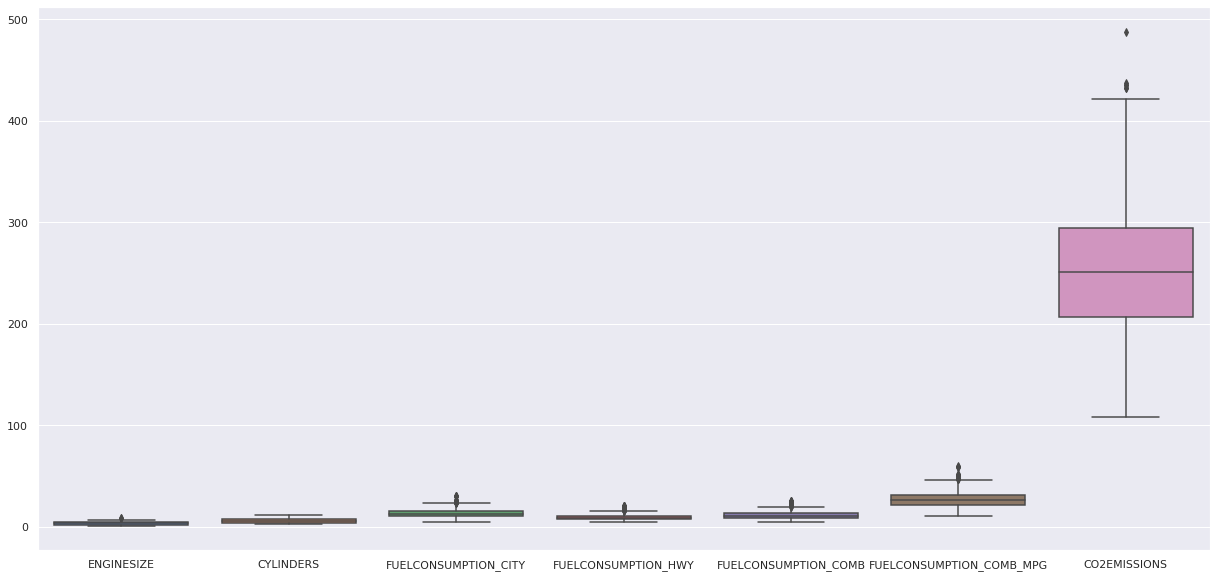

In [45]:
sns.set(rc={'figure.figsize':(21,10)})
sns.boxplot(data=df.iloc[:,1:])

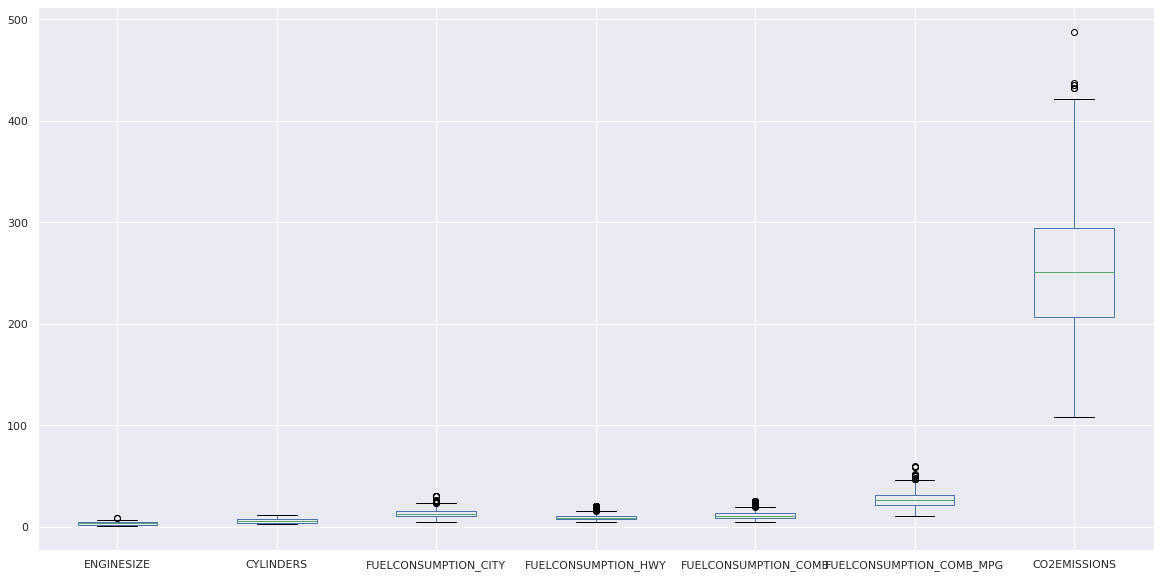

In [46]:
df.iloc[:,1:].boxplot(figsize=(20,10))

In [47]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler 


In [48]:
from sklearn.model_selection import train_test_split

In [49]:
#features = 'ENGINESIZE'
features =  ['ENGINESIZE','FUELCONSUMPTION_COMB']
X = df[features].values
Y = df['CO2EMISSIONS'].values


XScaled=StandardScaler().fit_transform(X)


X_train, X_test, Y_train, Y_test=train_test_split(XScaled,Y,random_state=51,test_size=0.20)




print("Dimensions of Original Data:")
print("Size(X):", X.shape, "; Size(Y)", Y.shape)
print("Dimensions of Training Data:")
print("Size(X_train):", X_train.shape, "; Size(Y_train)", Y_train.shape)
print("Dimensions of Test Data:")
print("Size(X_test):", X_test.shape, "; Size(Y_test)", Y_test.shape)

Dimensions of Original Data:
Size(X): (1067, 2) ; Size(Y) (1067,)
Dimensions of Training Data:
Size(X_train): (853, 2) ; Size(Y_train) (853,)
Dimensions of Test Data:
Size(X_test): (214, 2) ; Size(Y_test) (214,)


In [50]:
LR_model=LinearRegression()
LR_model.fit(X_train,Y_train)
print(f'w:{LR_model.coef_}')
print(f'w:{LR_model.intercept_}')

w:[27.55008002 33.08842819]
w:255.76664235440728


In [51]:
y_pred_test=LR_model.predict(X_test)
error=mean_squared_error(Y_test,y_pred_test) 
error

526.2935168501342

In [35]:
y_pred_train=LR_model.predict(X_train)
error_train=mean_squared_error(Y_train,y_pred_train) 
error_train

959.1199669708274

In [ ]:
#entire datasets


In [52]:
#features = 'ENGINESIZE'
features =  ['ENGINESIZE','FUELCONSUMPTION_COMB','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB_MPG']
X = df[features].values
Y = df['CO2EMISSIONS'].values


XScaled=StandardScaler().fit_transform(X)


X_train, X_test, Y_train, Y_test=train_test_split(XScaled,Y,random_state=51,test_size=0.20)




print("Dimensions of Original Data:")
print("Size(X):", X.shape, "; Size(Y)", Y.shape)
print("Dimensions of Training Data:")
print("Size(X_train):", X_train.shape, "; Size(Y_train)", Y_train.shape)
print("Dimensions of Test Data:")
print("Size(X_test):", X_test.shape, "; Size(Y_test)", Y_test.shape)

Dimensions of Original Data:
Size(X): (1067, 6) ; Size(Y) (1067,)
Dimensions of Training Data:
Size(X_train): (853, 6) ; Size(Y_train) (853,)
Dimensions of Test Data:
Size(X_test): (214, 6) ; Size(Y_test) (214,)


In [53]:
LR_model=LinearRegression()
LR_model.fit(X_train,Y_train)
print(f'w:{LR_model.coef_}')
print(f'w:{LR_model.intercept_}')

w:[ 12.53956492  21.5182391   12.85540062 -17.1218099    3.66136973
 -30.12352615]
w:255.8038199864272


In [54]:
y_pred_test=LR_model.predict(X_test)
error=mean_squared_error(Y_test,y_pred_test) 
error

430.36945263385337

In [55]:
y_pred_train=LR_model.predict(X_train)
error_train=mean_squared_error(Y_train,y_pred_train) 
error_train

448.5796305929415